In [1]:
import fastf1 as ff1
from fastf1 import plotting
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection
from matplotlib import cm
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
# Enable the cache
ff1.Cache.enable_cache(r'C:\Users\Carlos\Documents\Data Cache') 

In [3]:
race = ff1.get_session(2023, "Silverstone", "R")
race.load()

core           INFO 	Loading data for British Grand Prix - Race [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '44', '81', '63', '11', '14', '23', '16', '55', '2', '77', '27', '18', '24', '22', '21', '10', '20', '31']


In [4]:
# carregando as voltas
laps = race.laps.pick_quicklaps()

In [5]:
transformed_laps = laps.copy()
transformed_laps.loc[:, "LapTime (s)"] = laps["LapTime"].dt.total_seconds()

# order the team from the fastest (lowest median lap time) tp slower

team_order = (
    transformed_laps[["Team", "LapTime (s)"]]
    .groupby("Team")
    .median()["LapTime (s)"]
    .sort_values()
    .index
)

print(team_order)

#pegar a paleta de cores dos times
team_palette = {team: ff1.plotting.team_color(team) for team in team_order}

Index(['Red Bull Racing', 'McLaren', 'Mercedes', 'Ferrari', 'Aston Martin',
       'AlphaTauri', 'Williams', 'Alpine', 'Alfa Romeo', 'Haas F1 Team'],
      dtype='object', name='Team')


In [6]:
#transformando os dados em um dataframe
df = pd.DataFrame(laps)
df.head()

,Time,DriverNumber,LapTime,LapNumber,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,...,Compound,TyreLife,FreshTyre,Stint,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
1,0 days 01:05:19.568000,1,0 days 00:01:33.433000,2,NaT,NaT,0 days 00:00:29.616000,0 days 00:00:38,0 days 00:00:25.817000,0 days 01:04:15.751000,...,MEDIUM,2.0,True,1,0 days 01:03:46.135000,Red Bull Racing,VER,1,True,2023-07-09 14:04:47.171
2,0 days 01:06:52.298000,1,0 days 00:01:32.730000,3,NaT,NaT,0 days 00:00:29.380000,0 days 00:00:37.690000,0 days 00:00:25.660000,0 days 01:05:48.948000,...,MEDIUM,3.0,True,1,0 days 01:05:19.568000,Red Bull Racing,VER,1,True,2023-07-09 14:06:20.604
3,0 days 01:08:25.078000,1,0 days 00:01:32.780000,4,NaT,NaT,0 days 00:00:29.407000,0 days 00:00:37.650000,0 days 00:00:25.723000,0 days 01:07:21.705000,...,MEDIUM,4.0,True,1,0 days 01:06:52.298000,Red Bull Racing,VER,1,True,2023-07-09 14:07:53.334
4,0 days 01:09:57.660000,1,0 days 00:01:32.582000,5,NaT,NaT,0 days 00:00:29.338000,0 days 00:00:37.403000,0 days 00:00:25.841000,0 days 01:08:54.416000,...,MEDIUM,5.0,True,1,0 days 01:08:25.078000,Red Bull Racing,VER,1,True,2023-07-09 14:09:26.114
5,0 days 01:11:30.687000,1,0 days 00:01:33.027000,6,NaT,NaT,0 days 00:00:29.667000,0 days 00:00:37.543000,0 days 00:00:25.817000,0 days 01:10:27.327000,...,MEDIUM,6.0,True,1,0 days 01:09:57.660000,Red Bull Racing,VER,1,True,2023-07-09 14:10:58.696


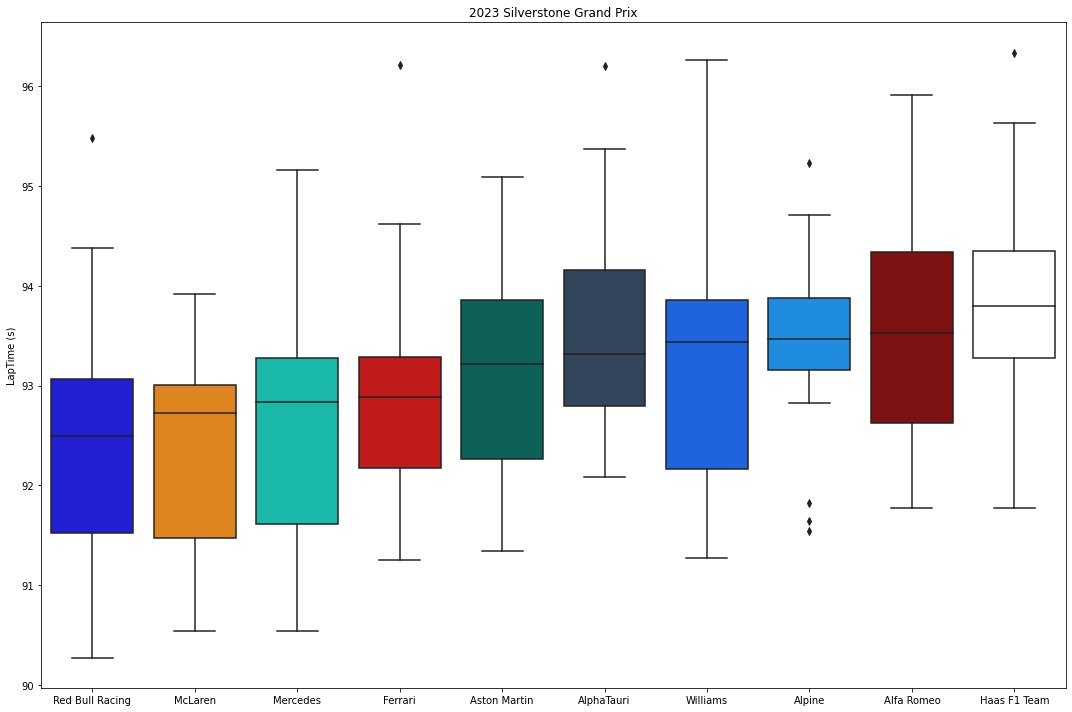

In [7]:
#desenhar o canvas
fig, ax = plt.subplots(figsize=(15, 10))

sns.boxplot(
    data=transformed_laps,
    x="Team",
    y="LapTime (s)",
    order=team_order,
    palette=team_palette,
    #whiskerprops=dict(color="white"),
    #boxprops=dict(edgecolor="white"),
    #medianprops=dict(color="grey"),
    #capprops=dict(color="white")
)

plt.title("2023 Silverstone Grand Prix")
plt.grid(visible=False)

# x-label is redundant
ax.set(xlabel=None)
plt.tight_layout()
plt.show()

In [8]:
df.describe()

,Time,LapTime,LapNumber,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,TyreLife,Stint,LapStartTime
count,815,815,815.000000,0,14,813,815,815,813,815,815,649.000000,815.000000,801.000000,815.000000,815.000000,815.000000,815
mean,0 days 01:42:46.210109202,0 days 00:01:33.033569325,25.046626,NaT,0 days 01:39:19.454571428,0 days 00:00:29.678894218,0 days 00:00:37.651548466,0 days 00:00:25.703672392,0 days 01:41:42.384375153,0 days 01:42:20.506588957,0 days 01:42:46.210242944,299.505393,256.179141,246.352060,304.424540,14.846626,1.489571,0 days 01:41:13.176439263
std,0 days 00:25:43.317924524,0 days 00:00:01.032924343,15.344217,NaT,0 days 00:12:58.274566680,0 days 00:00:00.330233867,0 days 00:00:00.521016828,0 days 00:00:00.363870105,0 days 00:25:43.777603591,0 days 00:25:43.530296633,0 days 00:25:43.317859104,10.241545,3.356728,5.693496,10.889726,7.536140,0.700703,0 days 00:25:44.133139304
min,0 days 01:05:18.615000,0 days 00:01:30.275000,2.000000,NaT,0 days 01:13:16.312000,0 days 00:00:28.668000,0 days 00:00:36.344000,0 days 00:00:24.844000,0 days 01:04:15.236000,0 days 01:04:52.717000,0 days 01:05:18.615000,278.000000,246.000000,98.000000,284.000000,2.000000,1.000000,0 days 01:03:45.569000
25%,0 days 01:21:02.745500,0 days 00:01:32.327000,12.000000,NaT,0 days 01:32:35.057750,0 days 00:00:29.397000,0 days 00:00:37.307500,0 days 00:00:25.487500,0 days 01:19:59.045000,0 days 01:20:36.701000,0 days 01:21:02.745500,292.000000,254.000000,245.000000,297.000000,9.000000,1.000000,0 days 01:19:28.917500
50%,0 days 01:38:02.732000,0 days 00:01:33.100000,23.000000,NaT,0 days 01:45:05.603000,0 days 00:00:29.744000,0 days 00:00:37.606000,0 days 00:00:25.692000,0 days 01:36:59.715000,0 days 01:37:37.206000,0 days 01:38:02.732000,297.000000,256.000000,246.000000,302.000000,14.000000,1.000000,0 days 01:36:29.977000
75%,0 days 02:10:49.661000,0 days 00:01:33.728500,41.000000,NaT,0 days 01:47:28.967250,0 days 00:00:29.926000,0 days 00:00:37.956000,0 days 00:00:25.893500,0 days 02:09:47.335000,0 days 02:10:24.572000,0 days 02:10:49.661000,308.000000,259.000000,248.000000,310.000000,20.000000,2.000000,0 days 02:09:18.674000
max,0 days 02:27:59.040000,0 days 00:01:36.337000,52.000000,NaT,0 days 01:52:10.697000,0 days 00:00:30.851000,0 days 00:00:39.301000,0 days 00:00:29.390000,0 days 02:26:56.010000,0 days 02:27:33.440000,0 days 02:27:59.040000,331.000000,265.000000,252.000000,338.000000,32.000000,4.000000,0 days 02:26:26.620000
